In [18]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [9]:
pd.set_option('display.max_columns', 50)

## Load data

In [10]:
df_l = pd.read_csv("data/celeba_buffalo_l.csv")

In [11]:
df_l_embeddings = df_l.select_dtypes("float")
df_l_features = df_l.select_dtypes("int").drop(columns=["id"])
df_l_images = df_l.loc[:, ["image_name", "id"]]

## Precomputation

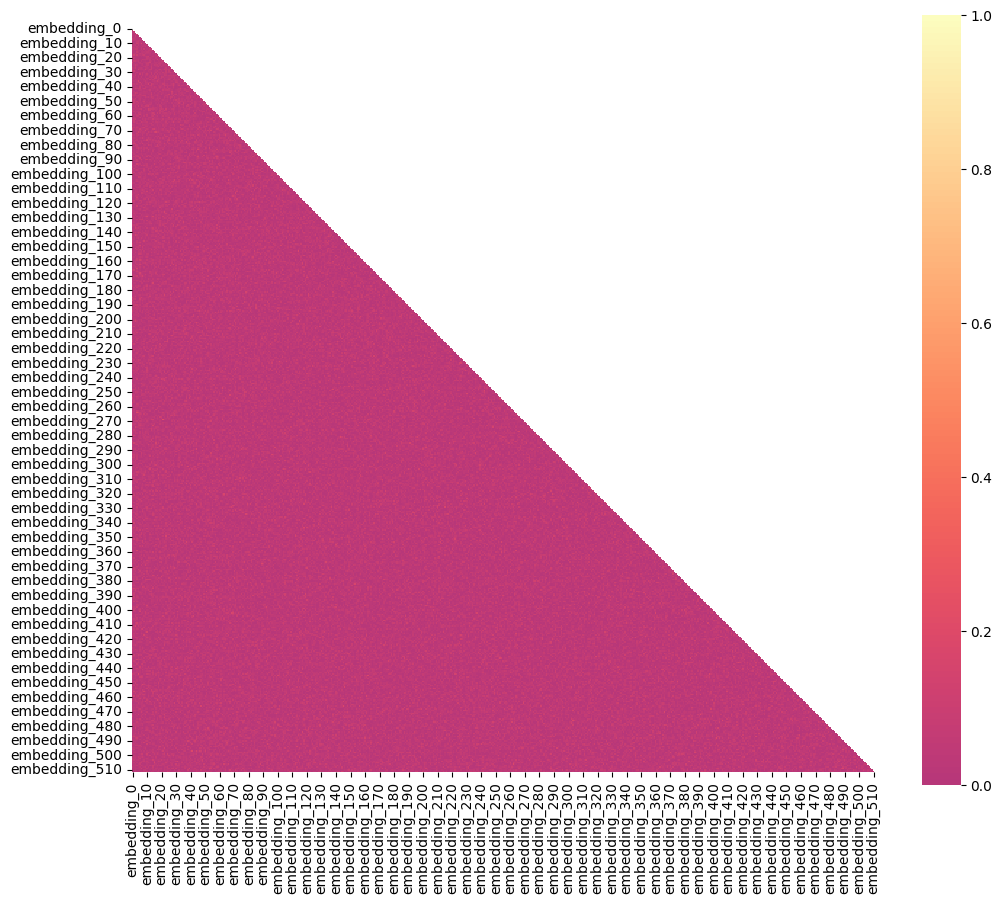

In [16]:
def correlation_matrix(df: pd.DataFrame) -> None:
	fig = plt.subplots(figsize=(12, 10))
	corr = df.corr().abs()

	mask = np.triu(np.ones_like(corr, dtype=bool))
	sns.heatmap(corr, mask=mask, cmap="magma", square=True, vmin=0, vmax=1, center=0, annot=False)

correlation_matrix(df_l_embeddings)

## DR

In [20]:
pca = PCA(n_components=50)
df_l_embeddings_pca_50d = pca.fit_transform(df_l_embeddings)

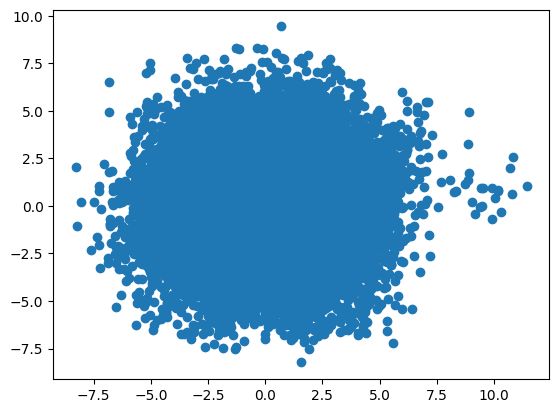

In [24]:
pca = PCA(n_components=2)
df_l_embeddings_pca_2d = pca.fit_transform(df_l_embeddings_pca_50d)
plt.scatter(x=df_l_embeddings_pca_2d[:,0], y=df_l_embeddings_pca_2d[:,1])

In [25]:
kmeans = KMeans(n_clusters=5)
kmeans.fit_transform(df_l_embeddings_pca_2d)

/Users/mathieu/Lab/ldata2010-project/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[1.98116338, 0.97318379, 3.71701109, 3.31920863, 4.97350678],
       [2.30035392, 2.72088836, 1.42815991, 5.02510478, 4.61461519],
       [1.7477037 , 3.32768907, 4.71462588, 1.14382838, 3.50430504],
       ...,
       [4.31351428, 1.96421664, 6.08072121, 4.15372019, 7.15765693],
       [3.46820765, 4.39707926, 0.52438669, 6.35173126, 4.79258154],
       [3.16221202, 2.71191817, 1.93483283, 5.72708917, 5.56611083]])

In [12]:
tsne = TSNE(n_components=2)
df_l_embeddings_2d = tsne.fit_transform(df_l_embeddings)

plt.scatter(x=df_l_embeddings_2d[0], y=df_l_embeddings_2d[1])

TypeError: 'TSNE' object is not subscriptable

In [14]:
df_l_embeddings_2d

AttributeError: 'TSNE' object has no attribute 'transform'

## Clustering

In [6]:
df_s = pd.read_csv("data/celeba_buffalo_s.csv")
df_s.head(5)

,image_name,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,...,embedding_488,embedding_489,embedding_490,embedding_491,embedding_492,embedding_493,embedding_494,embedding_495,embedding_496,embedding_497,embedding_498,embedding_499,embedding_500,embedding_501,embedding_502,embedding_503,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511,id
0,000001.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,...,-0.696074,-1.020557,1.200183,-0.111039,1.595438,-1.632504,0.191714,0.323044,-2.054769,-1.322355,-0.196904,-0.778327,-0.919247,-0.203325,-0.023952,1.386229,1.038198,0.203400,0.152553,-1.347952,0.525928,-0.857195,-0.624359,0.574275,2880
1,000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1.209094,1.049657,-0.899133,-0.338053,0.932248,-1.552155,1.791231,0.544532,-0.330701,-0.167529,0.734353,1.418524,-0.152465,-0.061196,0.260606,1.489825,-0.734394,-0.407281,0.822241,-0.412348,0.441994,0.071413,0.644596,-0.102929,5805
2,000006.jpg,-1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,...,-1.123917,-0.398579,1.058913,-1.130438,-1.716764,-0.237284,0.157904,0.006060,0.931404,0.606520,-2.702054,-0.548417,-0.826437,-1.704484,-0.381546,-0.293804,0.464465,-0.786862,-0.055037,0.191128,0.354288,-1.069309,-0.270704,-1.608960,4153
3,000008.jpg,1,1,1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,...,-0.313921,-0.437333,-0.351423,-0.602644,1.353177,-0.215119,-0.381469,-0.079622,-0.627032,-0.652298,-0.032851,-0.248949,0.126721,0.434505,0.624974,0.053876,-2.210749,-0.016998,-1.511237,0.768989,1.729786,-0.595846,0.707644,-0.234487,6369
4,000018.jpg,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,1,...,-1.805863,-0.458248,-1.198148,-0.300404,-0.840652,0.660510,2.165788,0.308929,0.904349,0.950036,1.202098,-0.897074,0.107450,-0.033218,0.341663,1.088580,-0.577434,0.668719,1.479633,-1.114480,-0.418312,-0.802752,-0.038157,0.417186,2464


In [18]:
%%time
selected_features = ["5_o_Clock_Shadow", "Arched_Eyebrows"]
features_mask = df_l_features[selected_features].isin([1]).all(axis=1)

df_l_images[features_mask].loc[:, "image_name"][0:10]

CPU times: user 7.46 ms, sys: 10.9 ms, total: 18.3 ms
Wall time: 16.2 ms


3      000008.jpg
135    000838.jpg
169    001020.jpg
209    001279.jpg
328    002018.jpg
332    002039.jpg
408    002519.jpg
592    003751.jpg
615    003879.jpg
633    004056.jpg
Name: image_name, dtype: object

In [20]:
%%time
df_l_features_dict = df_l_features.to_dict("records")
df_l_features_dict

CPU times: user 334 ms, sys: 31 ms, total: 365 ms
Wall time: 600 ms


[{'5_o_Clock_Shadow': -1,
  'Arched_Eyebrows': 1,
  'Bags_Under_Eyes': -1,
  'Bald': -1,
  'Bangs': -1,
  'Big_Lips': -1,
  'Big_Nose': -1,
  'Black_Hair': -1,
  'Blond_Hair': -1,
  'Blurry': -1,
  'Brown_Hair': 1,
  'Bushy_Eyebrows': -1,
  'Chubby': -1,
  'Double_Chin': -1,
  'Eyeglasses': -1,
  'Goatee': -1,
  'Gray_Hair': -1,
  'Heavy_Makeup': 1,
  'High_Cheekbones': 1,
  'Male': -1,
  'Mouth_Slightly_Open': 1,
  'Mustache': -1,
  'Narrow_Eyes': -1,
  'No_Beard': 1,
  'Oval_Face': -1,
  'Pale_Skin': -1,
  'Pointy_Nose': 1,
  'Receding_Hairline': -1,
  'Rosy_Cheeks': -1,
  'Sideburns': -1,
  'Smiling': 1,
  'Straight_Hair': 1,
  'Wavy_Hair': -1,
  'Wearing_Earrings': 1,
  'Wearing_Hat': -1,
  'Wearing_Lipstick': 1,
  'Wearing_Necklace': -1,
  'Wearing_Necktie': -1,
  'Young': 1},
 {'5_o_Clock_Shadow': -1,
  'Arched_Eyebrows': -1,
  'Bags_Under_Eyes': -1,
  'Bald': -1,
  'Bangs': -1,
  'Big_Lips': -1,
  'Big_Nose': -1,
  'Black_Hair': -1,
  'Blond_Hair': -1,
  'Blurry': -1,
  'Brown_H

In [ ]:
df_l_features_dict

In [13]:
df_s_embeddings = df_s.select_dtypes("float")
df_s_features = df_s.select_dtypes("int").drop(columns=["id"])
df_s_images = df_s.loc[:, ["image_name", "id"]]

# df_s_embeddings.to_parquet("data/celeba_buffalo_s__embeddings.gzip")
# df_s_embeddings.to_csv("data/celeba_buffalo_s__embeddings.csv")
# df_s_features.to_parquet("data/celeba_buffalo_s__features.gzip")
# df_s_images.to_parquet("data/celeba_buffalo_s__images.gzip")

In [13]:
features.columns.to_list()

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

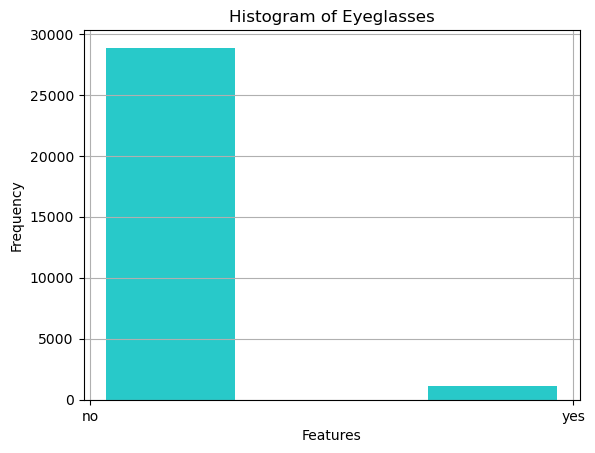

In [23]:
FEATURE = "Eyeglasses"

def histogram_of_feature(df, feature: str):
	ax = df[feature].replace({-1: "no", 1: "yes"}).hist(bins=3, rwidth=0.8, alpha=0.6, color="c")
	
	ax.set_xlabel("Features")
	ax.set_ylabel("Frequency")
	ax.set_title(f"Histogram of {FEATURE}")

histogram_of_feature(features, FEATURE)

In [6]:
def feature_presence_counter(df):
	#df[feature].replace({-1: "no", 1: "yes"}).unique()
	counts = pd.DataFrame({col: df[col].value_counts() for col in df})
	counts = counts.iloc[1]
	counts = counts.sort_values(ascending=False)
	counts = pd.DataFrame(counts).reset_index()
	counts.columns = ["Feature", "Count"]
	return counts

feature_presence_counter(df_l_features)

,Feature,Count
0,No_Beard,25407
1,Young,24332
2,Wearing_Lipstick,17287
3,Mouth_Slightly_Open,14205
4,Smiling,13929
5,Heavy_Makeup,13587
6,High_Cheekbones,13522
7,Arched_Eyebrows,12592
8,Wavy_Hair,11205
9,Pointy_Nose,10339


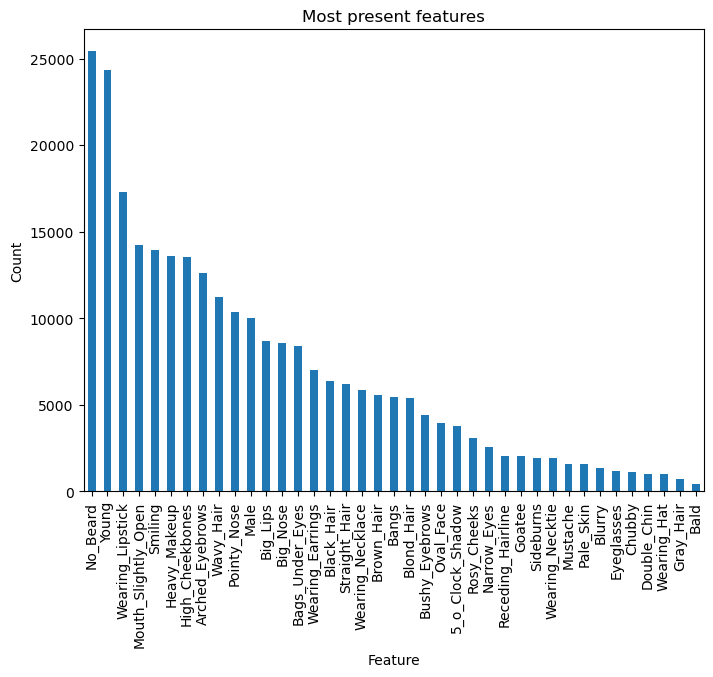

In [30]:
def feature_presence_couter_plot(df):
	counts = pd.DataFrame({col: df[col].value_counts() for col in df})
	counts = counts.iloc[1]
	counts = counts.sort_values(ascending=False)

	fig, ax = plt.subplots(figsize=(8, 6))
	counts.plot(kind="bar", ax=ax)

	ax.set_title("Most present features")
	ax.set_xlabel("Feature")
	ax.set_ylabel("Count")

feature_presence_couter_plot(features)

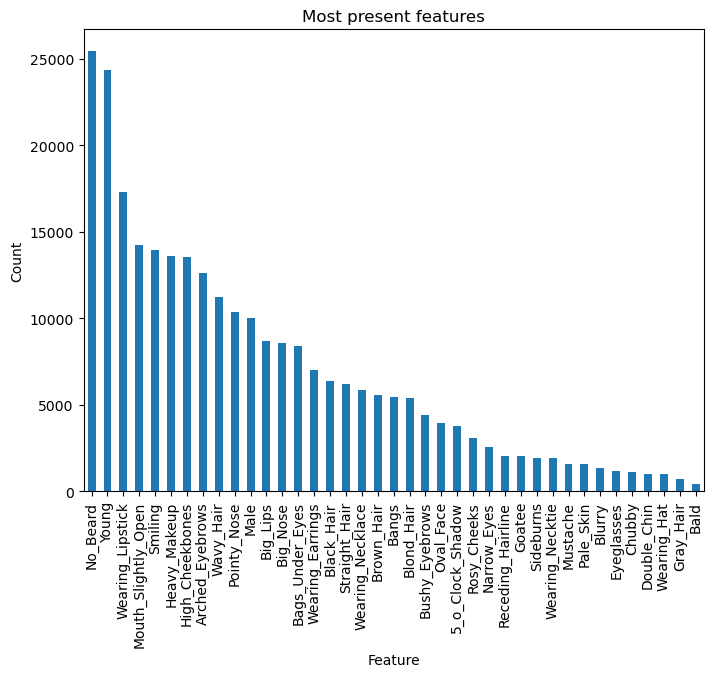

In [31]:
feature_presence_couter_plot(subset2)

In [54]:
def correlation_between_feature(df):
	fig = plt.subplots(figsize=(12, 10))
	corr = df.corr().abs()

	mask = np.triu(np.ones_like(corr, dtype=bool))
	sns.heatmap(corr, mask=mask, cmap="magma", square=True, vmin=0, vmax=1, center=0, annot=False)

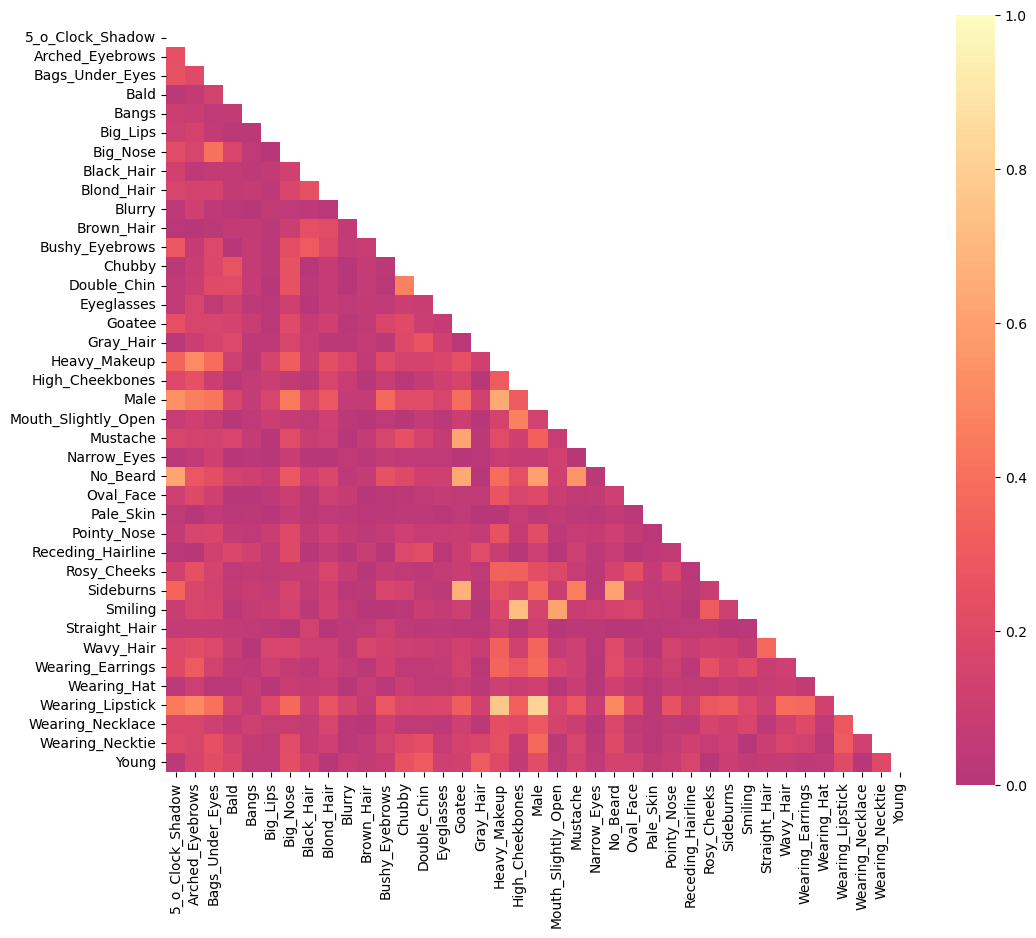

In [55]:
correlation_between_feature(features)

<Axes: xlabel='No_Beard', ylabel='embedding_0'>

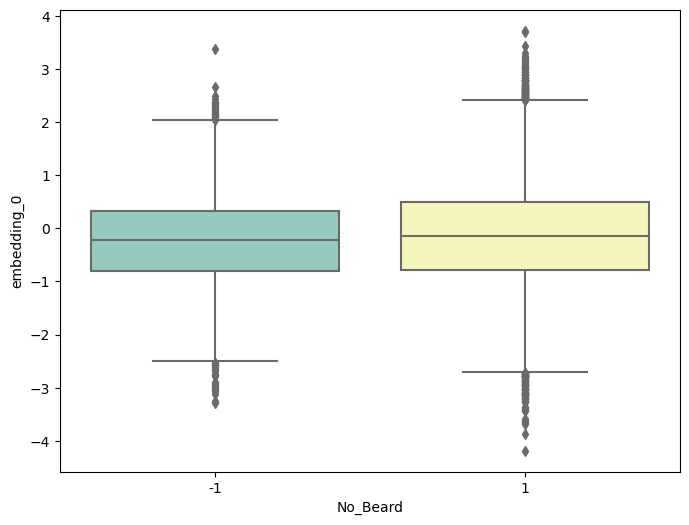

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="No_Beard", y="embedding_0", data=df1, palette="Set3")

<Axes: xlabel='No_Beard', ylabel='embedding_0'>

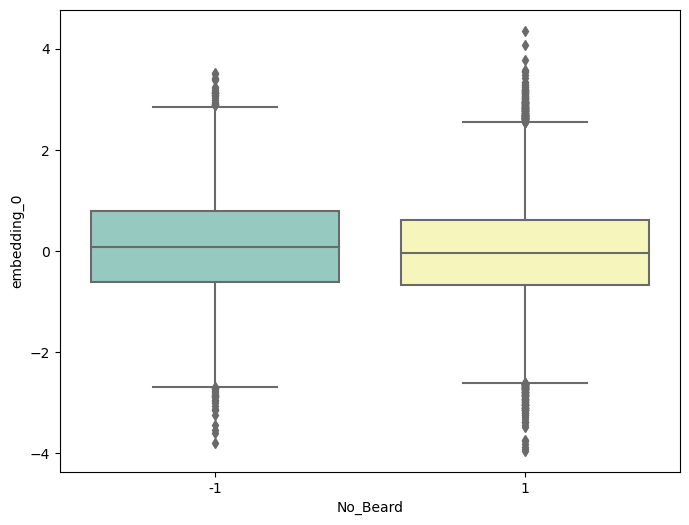

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="No_Beard", y="embedding_0", data=df2, palette="Set3")